In [ ]:
from multidict import MultiDict
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv(r"https://raw.githubusercontent.com/meleshko-anastasiia/DZ/refs/heads/main/Computers.csv")
df

In [ ]:
item = 'Computers' # Выбрать из поля Item для вашего датасета
package = 'Ecdat' # Выбрать из поля Package для вашего датасета

df = sm.datasets.get_rdataset(item, package , cache=True).data
df.head()

In [ ]:
#2.Сформулируйте на базе переменных три вида гипотез

In [ ]:
#a)Выберите две категориальные переменные и сформулируйте гипотезу об их взаимосвязи
#тест о взаимосвязи multy(мультимидийности) и premium сегмента

In [ ]:
df.info()

In [ ]:
df['premium'] = df['premium'].astype(float)

In [ ]:
seg_dict = {0 : 'no',  1 : 'yes'}
multi_dict = {0 : 'yes', 1 : 'no'}
df['multi'] = df['multi'].map(seg_dict).fillna('more')
df['premium'] = df['premium'].map(multi_dict)

In [ ]:
df_heat = pd.crosstab(df['multi'], df['premium'])
df_heat

In [ ]:
stats.chi2_contingency(df_heat)

In [ ]:
#b)Выберите одну категориальную и одну числовую переменную и сформулируйте гипотезу об их взаимосвязи
#тест о взаимосвязи ram и premium сегмента

In [ ]:
df.head()

In [ ]:
mat_dict = {2 : 'Other',  4 : 'Panel',  8 : 'Monolithic', 16 : 'Brick', 32 : 'Blocky', 5 :'Wooden'}
rooms_dict = {-1: 'Studio', 1 : '1k', 2 : '2k', 3 : '3k'}
df['ram'] = df['ram'].map(rooms_dict).fillna('more')
df['premium'] = df['premium'].map(mat_dict)

In [ ]:
df_heat = pd.crosstab(df['ram'], df['premium'])
df_heat

In [ ]:
stats.chi2_contingency(df_heat)

In [ ]:
#c)Выберите две числовые переменные и сформулируйте гипотезу об их взаимосвязи
# ram и speed

In [ ]:
#3.Для каждой гипотезы постарайтесь привести логический смысл, почему вы считаете, что эта взаимосвязь должна существовать и какую форму 
#взаимосвязи вы ожидаете. Что это дает с практической точки зрения?

In [ ]:
#4.Для выбранных переменных проведите разведочный анализ данных. Приведите наиболее подходящие описательные статистики, частотные распределения,
#постройте графики, которые бы давали представление как о переменных по отдельности, так и об их взаимосвязи


In [ ]:
# 5. Проведите очистку данных от пропусков, выбросов и некорректных значений любым выбранным способом. Постарайтесь обосновать этот способ

In [ ]:
df.isna().sum()

In [7]:
df.describe()

,price,speed,hd,ram,screen,ads,trend
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,2219.576610,52.011024,416.601694,8.286947,14.608723,221.301007,15.926985
std,580.803956,21.157735,258.548445,5.631099,0.905115,74.835284,7.873984
min,949.000000,25.000000,80.000000,2.000000,14.000000,39.000000,1.000000
25%,1794.000000,33.000000,214.000000,4.000000,14.000000,162.500000,10.000000
50%,2144.000000,50.000000,340.000000,8.000000,14.000000,246.000000,16.000000
75%,2595.000000,66.000000,528.000000,8.000000,15.000000,275.000000,21.500000
max,5399.000000,100.000000,2100.000000,32.000000,17.000000,339.000000,35.000000


<Axes: >

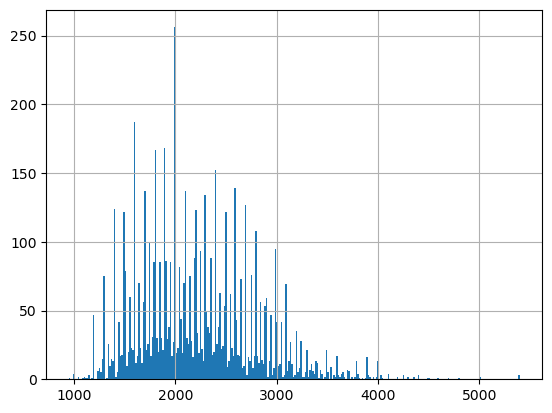

In [18]:
df['price'].hist(bins = 300)

In [111]:
#На данном графике выбросы видно не очень хорошо, поэтому используем другой

<Axes: >

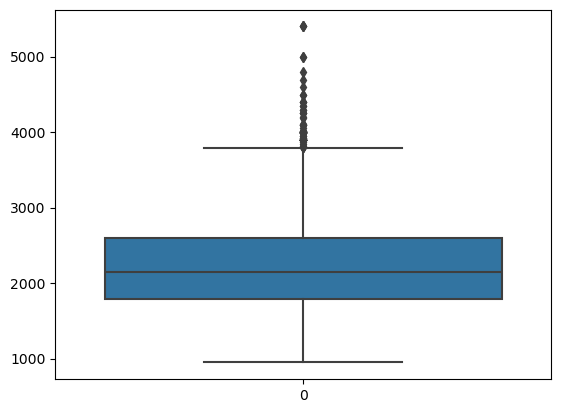

In [92]:
import seaborn as sns
sns.boxplot(df['price'])

In [ ]:
#На приведенном выше графике хорошо видно, что значения выше 4000 действуют как выбросы. 
#Boxplot обобщает выборочные данные с использованием 25-го, 50-го и 75-го процентилей.
#Можно просто получить представление (квартили, медиану и выбросы) о наборе данных, просто взглянув на его блок-схему

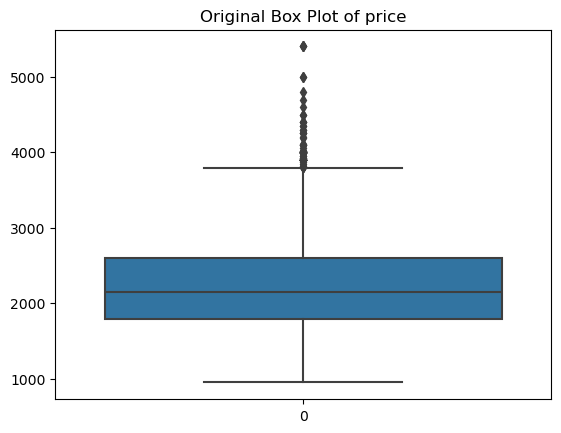

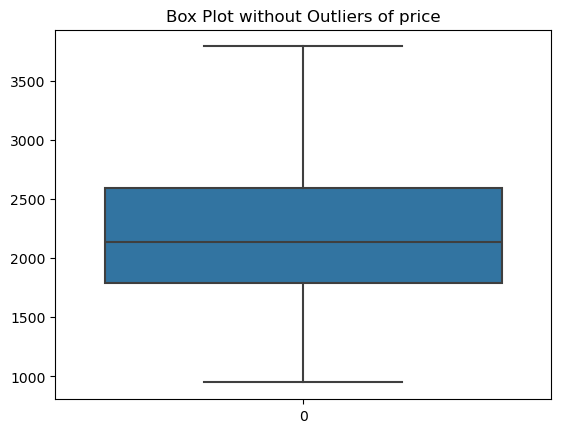

In [102]:
#Построение «ящика с усами» , чтобы получить представление до и после удаления выбросов 
def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    removed_outliers = df[df[column] <= threshold]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers


threshold_value = 3790

no_outliers = removal_box_plot(df, 'price', threshold_value)

In [186]:
#Будем считать что выбросы находятся за пределами значений 3750 и 1000
df[(df['price']<=3750)|(df['price']>=1000)]

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend,multi_adj,segment
0,1499,25,80,4,14,no,no,yes,94,1,more,NaN
1,1795,33,85,2,14,no,no,yes,94,1,more,NaN
2,1595,25,170,4,15,no,no,yes,94,1,more,NaN
3,1849,25,170,8,14,no,no,no,94,1,more,NaN
4,3295,33,340,16,14,no,no,yes,94,1,more,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6254,1690,100,528,8,15,no,no,yes,39,35,more,NaN
6255,2223,66,850,16,15,yes,yes,yes,39,35,more,NaN
6256,2654,100,1200,24,15,yes,no,yes,39,35,more,NaN
6257,2195,100,850,16,15,yes,no,yes,39,35,more,NaN


In [187]:
prices = df.price #Извлечение столбца цен
prices.head(10) # Вывод первых 10 значений

0    1499
1    1795
2    1595
3    1849
4    3295
5    3695
6    1720
7    1995
8    2225
9    2575
Name: price, dtype: int64

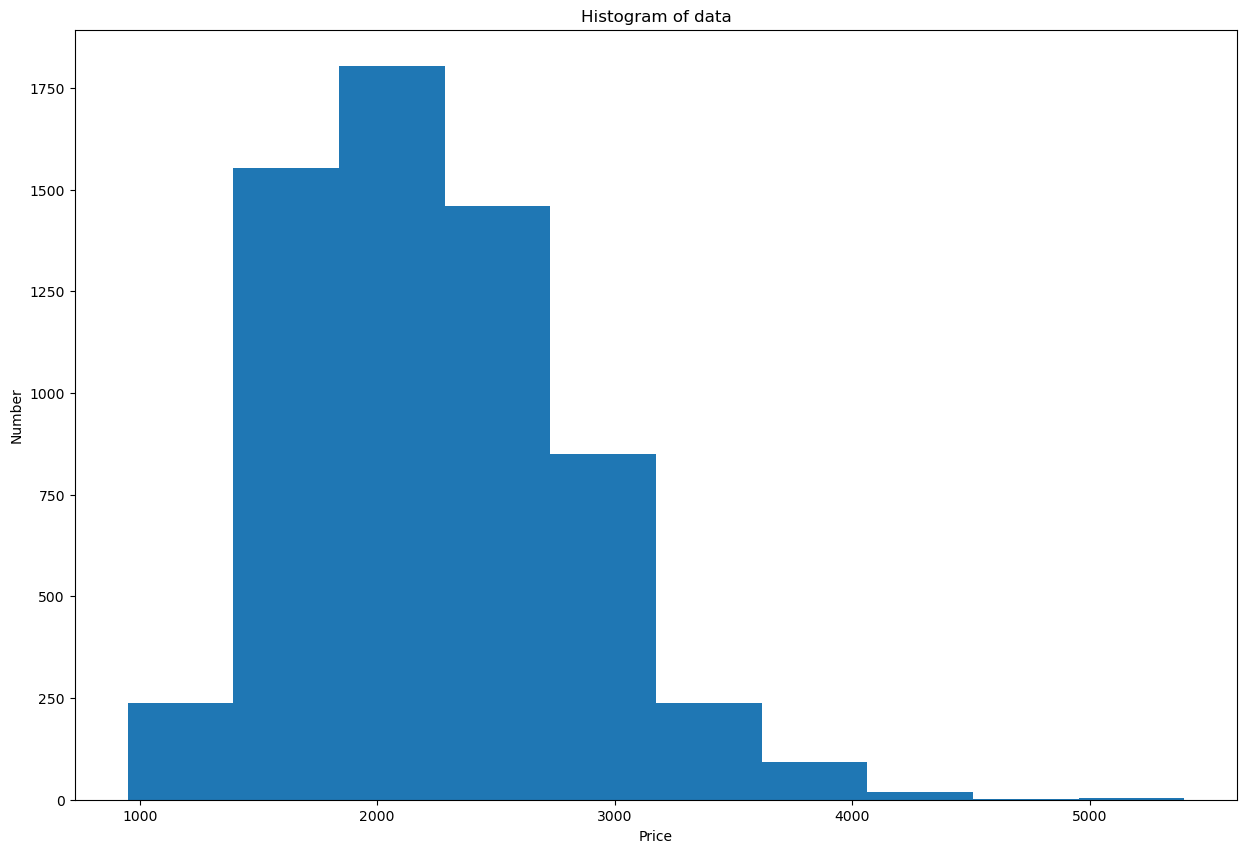

In [188]:
# Lets plot a histogram to see if our data is normally distributed
fig= plt.subplots(figsize=(15, 10))
plt.xticks()
plt.yticks()
plt.title("Histogram of data")
plt.xlabel("Price")
plt.ylabel("Number")
plt.hist(prices)
plt.show()

In [ ]:
#Кажется, что данные больше смещены влево. 
#Причина, по которой данные смещены влево, заключается в том, что большая часть цен на компьютеры приходится на 2000-е годы, в то время как максимальная
#5000-е годы. Это приводит к неравномерному распределению в наборе данных.

In [106]:
#6.Протестируйте распределение числовой переменной на соответствие нормальному. Постройте QQ-plot и гистограмму

In [107]:
df1 = df.loc[df['premium']=='yes', 'price']
df2 = df.loc[df['premium']=='no', 'price']

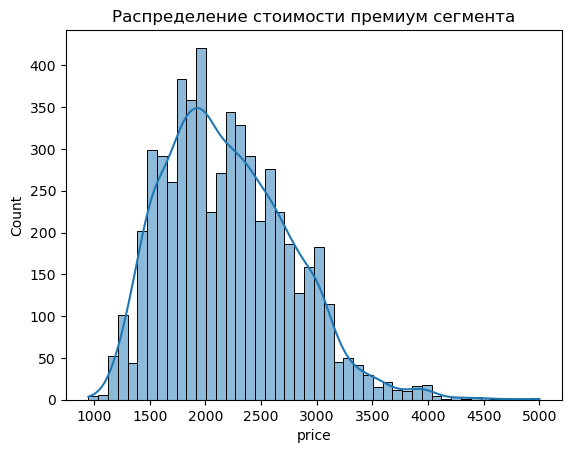

In [121]:
fig = plt.figure()
plt.title('Распределение стоимости премиум сегмента')
sns.histplot(df1[df1<5000], kde = True)
plt.show()

In [112]:
df1 = df.loc[(df['premium']=='yes')&(df['price']<5000), 'price']
df2 = df.loc[(df['premium']=='no')&(df['price']<5000), 'price']

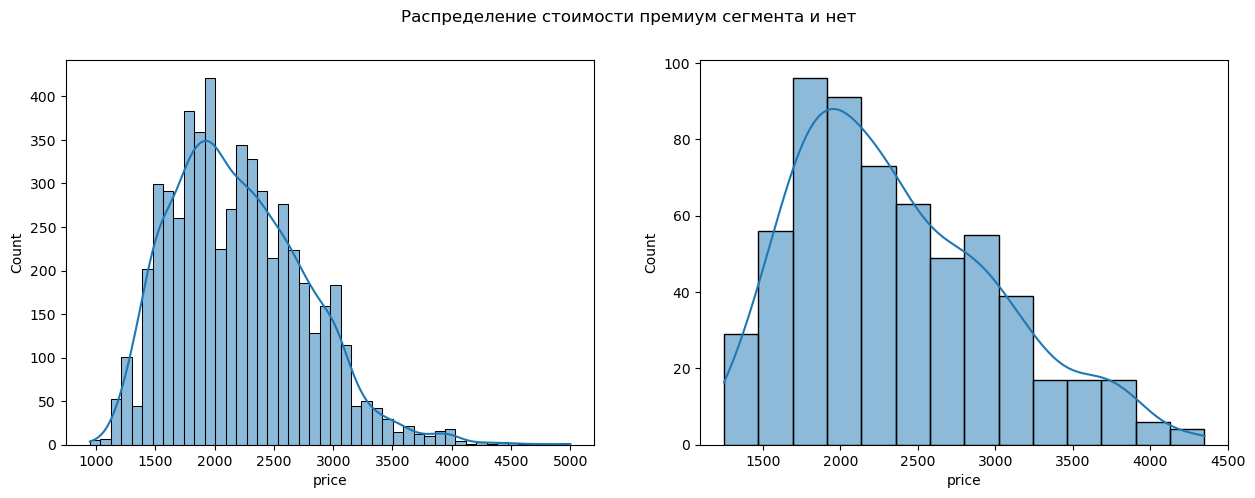

In [113]:
fig, ax  = plt.subplots(1,2, figsize = (15,5))
plt.suptitle('Распределение стоимости премиум сегмента и нет')
sns.histplot(df1, kde = True, ax = ax[0])
sns.histplot(df2, kde = True, ax = ax[1])
plt.show()

In [ ]:
#В не премиальном сегменте существуют модели схожие по цене с премиальным сегментом

In [114]:
print('Средняя: ', df1.mean())
print('Медиана: ', df1.median())
print('Скошенность: ', stats.skew(df1))
print('Эксцесс: ', stats.kurtosis(df1))

Средняя:  2202.4502126151665
Медиана:  2143.5
Скошенность:  0.6302556021872963
Эксцесс:  0.4267092343250445


In [115]:
print('Средняя: ', df2.mean())
print('Медиана: ', df2.median())
print('Скошенность: ', stats.skew(df2))
print('Эксцесс: ', stats.kurtosis(df2))

Средняя:  2361.9346405228757
Медиана:  2249.0
Скошенность:  0.6594366634993016
Эксцесс:  -0.1739594664079398


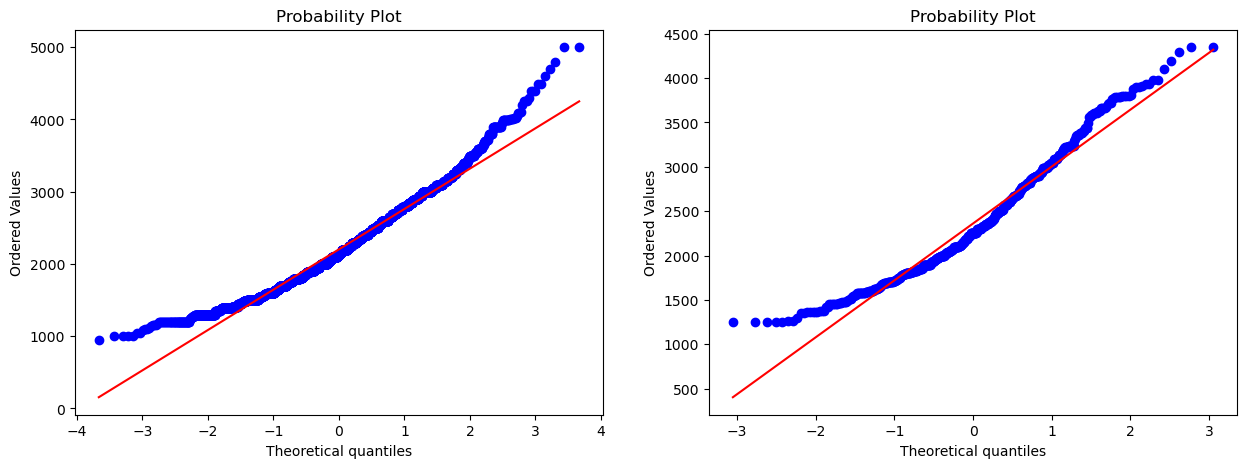

In [125]:
fig, ax  = plt.subplots(1,2, figsize = (15,5))
plt.title('QQ-plot')
stats.probplot(df1, dist="norm", plot = ax[0])
stats.probplot(df2, dist="norm", plot = ax[1])
plt.show()

In [119]:
# Тест Шапиро-Уилка
stats.shapiro(df1[df1<5000])

ShapiroResult(statistic=0.9728935956954956, pvalue=2.082402113315022e-31)

In [ ]:
#p-значение очень маленькое, т.е. нулевая гипотеза отвергается и распределение нельзя считать нормальным

In [117]:
#7.Проведите тесты гипотез из пункта (2) и сделайте выводы. Какой практический смысл имеют результаты проведенных тестов? Каких можно использовать?
